# How well jobs and skills pay for Data Analysts

In [1]:
# importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

c:\Users\Richa Tripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# filter for job titles and country
df_india=df[(df['job_country']=='India')].dropna(subset=['salary_year_avg'])

In [36]:
job_titles = ['Data Scientist','Senior Data Scientist', 'Data Engineer','Senior Data Engineer','Data Analyst','Senior Data Analyst']

df_india_top6 = df_india[df_india['job_title_short'].isin(job_titles)]



In [37]:
df_india_top6=df_india[df_india['job_title_short'].isin(job_titles)]

In [38]:
job_order=df_india_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

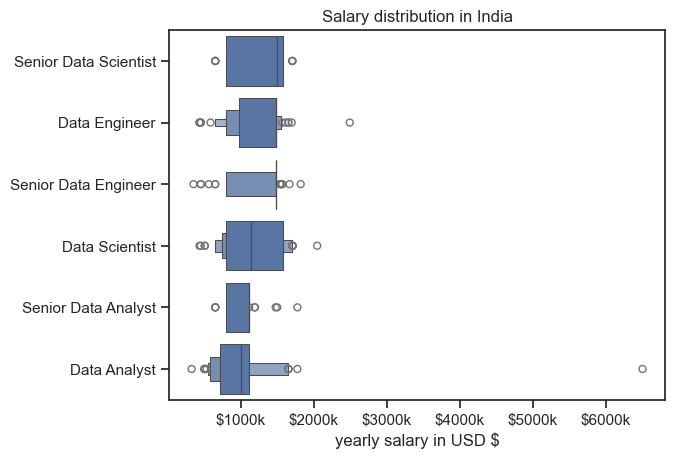

In [44]:
from matplotlib.axis import XAxis
sns.boxenplot(data=df_india_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary distribution in India')
plt.xlabel('yearly salary in USD $')
plt.ylabel('')
ticks_x=plt.FuncFormatter(lambda y,pos:f'${int(y/100)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


## Investigate median salary vs skill for Data Analyst

In [46]:
df_da_india=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='India')].copy()
df_da_india=df_da_india.dropna(subset=['salary_year_avg'])

In [48]:
df_da_india=df_da_india.explode('job_skills')
df_da_india[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [57]:
df_da_top_pay=df_da_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
y=df_da_top_pay.head(10).sort_values(by='median',ascending=False)
y

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [59]:
df_da_skills=df_da_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skills

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
...,...,...
unify,1,79200.0
unreal,1,105650.0
visio,1,119250.0


Text(0, 0.5, '')

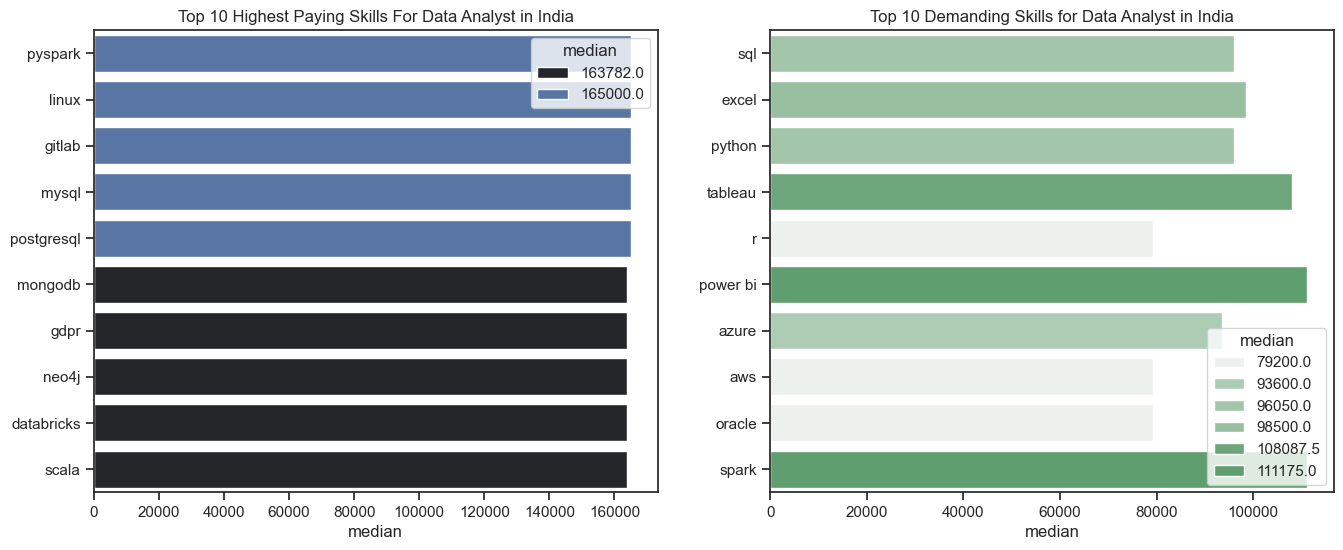

In [65]:
# Limit to top 10
top10_pay = df_da_top_pay.head(10)
top10_demand = df_da_skills.head(10)

# Plot
sns.set_theme(style='ticks')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.barplot(data=top10_pay, x='median', y=top10_pay.index, ax=ax[0], hue='median', palette='dark:b')
ax[0].set_title('Top 10 Highest Paying Skills For Data Analyst in India')
ax[0].set_ylabel('')

sns.barplot(data=top10_demand, x='median', y=top10_demand.index, ax=ax[1], hue='median', palette='light:g')
ax[1].set_title('Top 10 Demanding Skills for Data Analyst in India')
ax[1].set_ylabel('')
